In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv("microdados/CADASTRO_CURSOS_2020.CSV", encoding="ISO-8859-1", sep=";", low_memory=False)

display(df.head())

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_ORGANIZACAO_ACADEMICA,...,MAT_APOIO_SOCIAL,CONC_APOIO_SOCIAL,ATIV_EXTRACURRICULAR,ING_ATIV_EXTRACURRICULAR,MAT_ATIV_EXTRACURRICULAR,CONC_ATIV_EXTRACURRICULAR,MOB_ACADEMICA,ING_MOB_ACADEMICA,MAT_MOB_ACADEMICA,CONC_MOB_ACADEMICA
0,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,2020,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0


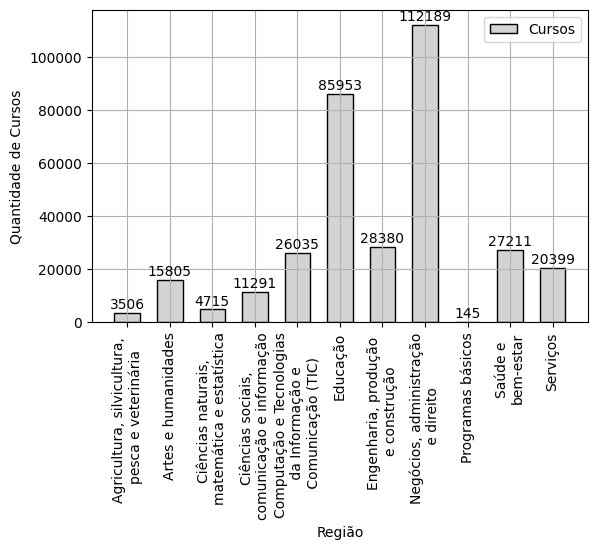

In [2]:
gb = df.groupby(by="NO_CINE_AREA_GERAL")["NO_CINE_AREA_GERAL"].count()

nome_cursos_geral = [
    "Agricultura, silvicultura, \npesca e veterinária",
    "Artes e humanidades",
    "Ciências naturais, \nmatemática e estatística",
    "Ciências sociais, \ncomunicação e informação",
    "Computação e Tecnologias\n da Informação e\n Comunicação (TIC)",
    "Educação",
    "Engenharia, produção \ne construção",
    "Negócios, administração\n e direito",
    "Programas básicos",
    "Saúde e \nbem-estar",
    "Serviços",
]

plt.bar(nome_cursos_geral, gb.array, color="lightgray", width=0.6, edgecolor="black")

plt.xlabel("Região")
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.23)
plt.ylabel("Quantidade de Cursos")

plt.grid(True)

plt.legend(["Cursos"])

for i, j in zip(nome_cursos_geral, gb.array):
    plt.annotate(
        str(j),
        xy=(i, j),
        xytext=(0, 1),
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

plt.savefig("graficos/num_cursos_por_regiao.png")
    
plt.show()


In [3]:
df['NO_REGIAO'].value_counts().reset_index()

,NO_REGIAO,count
0,Sudeste,132835
1,Sul,76630
2,Nordeste,61947
3,Centro-Oeste,30821
4,Norte,27227
5,Distância,5955
6,Exterior,214


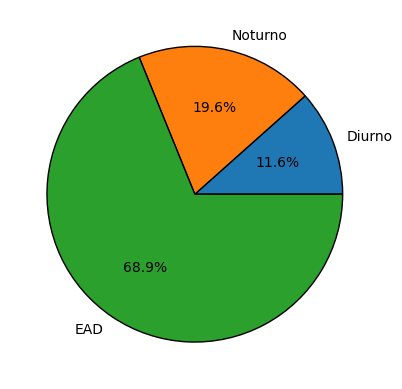

In [4]:
labels = ['Diurno', 'Noturno', 'EAD']
sizes = [df['QT_VAGA_TOTAL_DIURNO'].sum(), df['QT_VAGA_TOTAL_NOTURNO'].sum(), df['QT_VAGA_TOTAL_EAD'].sum()]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', wedgeprops={"edgecolor":"black", "linewidth": 1})

plt.savefig("graficos/quantidade_vagas_por_turno.png")

plt.show()

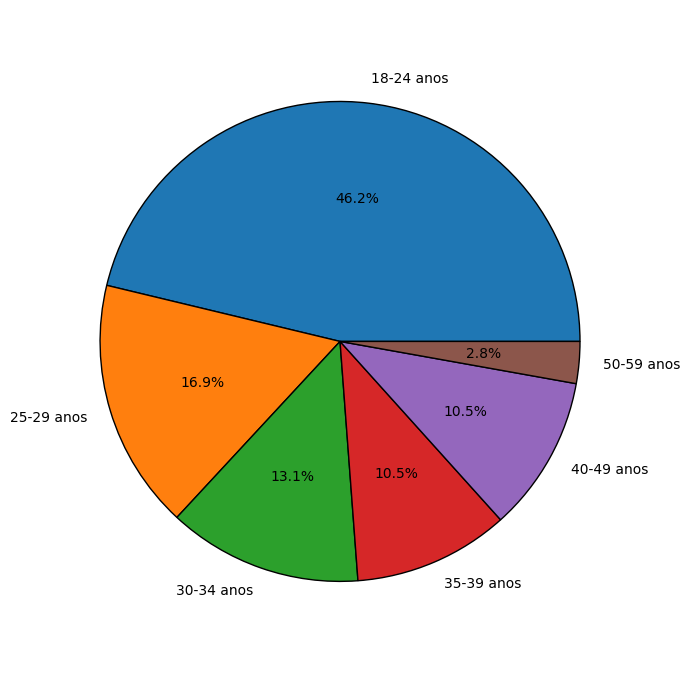

In [5]:
qtd_ingressantes_18_a_24_anos = df['ING_18_24'].sum()
qtd_ingressantes_25_a_29_anos = df['ING_25_29'].sum()
qtd_ingressantes_30_a_34_anos = df['ING_30_34'].sum()
qtd_ingressantes_35_a_39_anos = df['ING_35_39'].sum()
qtd_ingressantes_40_a_49_anos = df['ING_40_49'].sum()
qtd_ingressantes_50_a_59_anos = df['ING_50_59'].sum()

qtd_ingressantes = [
    qtd_ingressantes_18_a_24_anos, qtd_ingressantes_25_a_29_anos,
    qtd_ingressantes_30_a_34_anos, qtd_ingressantes_35_a_39_anos, qtd_ingressantes_40_a_49_anos,
    qtd_ingressantes_50_a_59_anos]

labels = ['18-24 anos', '25-29 anos', '30-34 anos', '35-39 anos', '40-49 anos', '50-59 anos']

explode = [0.1, 0, 0, 0, 0, 0, 0, 0.1]

fig1, ax1 = plt.subplots(figsize=(7, 7))

ax1.pie(qtd_ingressantes, labels=labels, autopct='%1.1f%%', wedgeprops={"edgecolor":"black", "linewidth": 1})

ax1.axis('equal')
plt.tight_layout()

plt.savefig("graficos/quantidade_ingressantes_por_faixa_etaria.png")

plt.show()


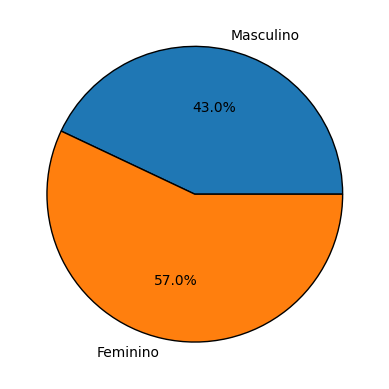

In [6]:
qtd_ingressantes_masculino = df['ING_MASC'].sum()
qtd_ingressantes_feminino = df['ING_FEM'].sum()

qtd_ingressantes = [qtd_ingressantes_masculino, qtd_ingressantes_feminino]

labels = ['Masculino', 'Feminino']

plt.pie(qtd_ingressantes, labels=labels, autopct='%1.1f%%', wedgeprops={"edgecolor":"black", "linewidth": 1})

plt.savefig("graficos/quantidade_ingressantes_por_sexo.png")

plt.show()

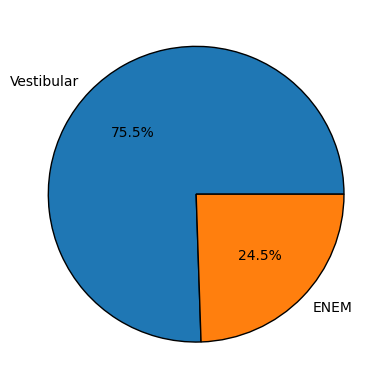

In [7]:
qtd_ingressantes_vestibular = df['ING_VESTIBULAR'].sum()
qtd_ingressantes_enem = df['ING_ENEM'].sum()

qtd_ingressantes = [qtd_ingressantes_vestibular, qtd_ingressantes_enem]

labels = ['Vestibular', 'ENEM']

plt.pie(qtd_ingressantes, labels=labels, autopct='%1.1f%%', wedgeprops={"edgecolor":"black", "linewidth": 1})

plt.savefig("graficos/quantidade_ingressantes_por_forma_de_ingresso.png")

plt.show()

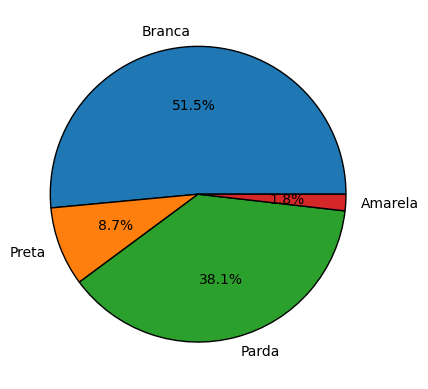

In [8]:
qtd_ingressantes_branca = df['ING_BRANCA'].sum()
qtd_ingressantes_preta = df['ING_PRETA'].sum()
qtd_ingressantes_parda = df['ING_PARDA'].sum()
qtd_ingressantes_amarela = df['ING_AMARELA'].sum()

qtd_ingressantes = [qtd_ingressantes_branca, qtd_ingressantes_preta, qtd_ingressantes_parda, qtd_ingressantes_amarela]

labels = ['Branca', 'Preta', 'Parda', 'Amarela']

plt.pie(qtd_ingressantes, labels=labels, autopct='%1.1f%%', wedgeprops={"edgecolor":"black", "linewidth": 1})

plt.savefig("graficos/quantidade_ingressantes_por_etnia.png")

plt.show()

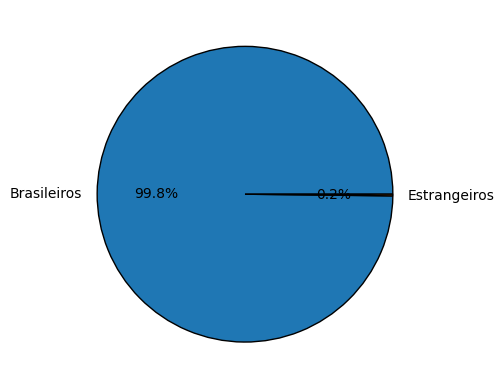

In [9]:
qtd_ingressantes_brasileiros = df['ING_NACBRAS'].sum()
qtd_ingressantes_estrangeiros = df['ING_NACESTRANG'].sum()

qtd_ingressantes = [qtd_ingressantes_brasileiros, qtd_ingressantes_estrangeiros]

labels = ['Brasileiros', 'Estrangeiros']

plt.pie(qtd_ingressantes, labels=labels, autopct='%1.1f%%', wedgeprops={"edgecolor":"black", "linewidth": 1})

plt.savefig("graficos/quantidade_ingressantes_por_nacionalidade.png")

plt.show()

In [10]:
from fpdf import FPDF
import os

diretorio_fontes = os.path.join(os.getcwd() + '/fontes/poppins')

class PDF(FPDF):
    def page_title(self, label, tamanho_fonte=16, alinhamento='C', espacamento=40):
        self.add_font('Poppins', 'B', os.path.join(diretorio_fontes, 'Poppins-Bold.ttf'), uni=True)
        self.set_font('Poppins', 'B', tamanho_fonte)
        self.cell(0, espacamento, label, align=alinhamento, ln=True)

    def page_subtitle(self, label, tamanho_fonte=14, alinhamento='C'):
        self.add_font('Poppins', 'SB', os.path.join(diretorio_fontes, 'Poppins-SemiBold.ttf' ), uni=True)
        self.set_font('Poppins', 'SB', tamanho_fonte)
        self.cell(0, 10, label, align=alinhamento, ln=True)

    def page_text(self, label, tamanho_fonte=16, alinhamento='C'):
        self.add_font('Poppins', 'R', os.path.join(diretorio_fontes, 'Poppins-Regular.ttf'), uni=True)
        self.set_font('Poppins', 'R', tamanho_fonte)
        self.multi_cell(0, 7, label, align=alinhamento)
        self.ln()

    def page_text_bold(self, label, tamanho_fonte=16, alinhamento='C'):
        self.add_font('Poppins', 'B', os.path.join(diretorio_fontes, 'Poppins-Bold.ttf'), uni=True)
        self.set_font('Poppins', 'B', tamanho_fonte)
        self.multi_cell(0, 7, label, align=alinhamento)
        self.ln()

    def page_text_medium(self, label, tamanho_fonte=16, alinhamento='C'):
        self.add_font('Poppins', 'M', os.path.join(diretorio_fontes, 'Poppins-Medium.ttf'), uni=True)
        self.set_font('Poppins', 'M', tamanho_fonte)
        self.multi_cell(0, 7, label, align=alinhamento)
        self.ln()

    def chapter_title(self, label):
        self.add_font('Poppins', 'B', os.path.join(diretorio_fontes, 'Poppins-Bold.ttf'), uni=True)
        self.set_font('Poppins', 'B', 17)
        self.cell(0, 10, label, 0, 1, "L")

    def chapter_text(self, text):
        self.add_font('Poppins', 'R', os.path.join(diretorio_fontes, 'Poppins-Regular.ttf'), uni=True)
        self.set_font('Poppins', 'R', 16)
        self.ln(5)
        self.multi_cell(0, 7, text)
        self.ln()

    def chapter_text_bold(self, text, espacamento=7):
        self.add_font('Poppins', 'B', os.path.join(diretorio_fontes, 'Poppins-Bold.ttf'), uni=True)
        self.set_font('Poppins', 'B', 16)
        self.ln(espacamento)
        self.multi_cell(0, 7, text)

    def chapter_text_medium(self, text, espacamento=7):
        self.add_font('Poppins', 'M', os.path.join(diretorio_fontes, 'Poppins-Medium.ttf'), uni=True)
        self.set_font('Poppins', 'M', 16)
        self.ln(espacamento)
        self.multi_cell(0, 7, text)

    def set_image(self, caminho_imagem):
        self.image(caminho_imagem, x=None, y=None, w=pdf.w - 20, h=0)

    def footer(self):
        self.set_y(-15)
        self.add_font('Poppins', 'R', os.path.join(diretorio_fontes, 'Poppins-Regular.ttf'), uni=True)
        self.set_font('Poppins', 'R', 10)
        self.cell(0, 10, f'Página {self.page_no()} de {{nb}}', align='C')

pdf = PDF()

pdf.add_page()

pdf.alias_nb_pages()

pdf.page_title("Relatório", tamanho_fonte=15)

pdf.ln(80)

pdf.page_title("Análise da Desigualdade Educacional no Brasil", tamanho_fonte=20)

pdf.page_subtitle("Projeto desenvolvido por: Cauan Menezes", tamanho_fonte=15)

pdf.add_page()

pdf.page_title("Introdução", tamanho_fonte=20)

pdf.page_text("A educação é um dos principais pilares para o desenvolvimento de um país, pois é através dela que as pessoas adquirem conhecimento e se tornam aptas a exercerem suas funções na sociedade. No Brasil, a educação é um direito garantido pela Constituição Federal de 1988, que estabelece que a educação é um direito de todos e dever do Estado e da família, sendo promovida e incentivada com a colaboração da sociedade, visando o pleno desenvolvimento da pessoa, seu preparo para o exercício da cidadania e sua qualificação para o trabalho.")
pdf.page_text("Apesar de ser um direito garantido por lei, a educação no Brasil ainda é um desafio, pois o país ainda apresenta altos índices de analfabetismo, evasão escolar e desigualdade educacional. A desigualdade educacional é um dos principais problemas enfrentados pela educação brasileira, pois ela é um dos fatores que contribuem para a evasão escolar e para o baixo desempenho dos alunos nas avaliações nacionais e internacionais.")
pdf.page_text("A desigualdade educacional é um problema que afeta a todos, pois ela é um dos fatores que contribuem para a desigualdade social, pois ela impede que as pessoas tenham acesso a uma educação de qualidade, o que dificulta a entrada delas no mercado de trabalho e as impede de terem uma vida digna.")

pdf.add_page()

pdf.chapter_title("Número de Cursos de Educação")

pdf.set_image("graficos/num_cursos.png")

pdf.ln(20)

pdf.page_text("O gráfico acima mostra o número de cursos de educação. Não é mencionado os nomes das regiões, portanto, é apenas possível concluir as áreas de Administração e Pedagogias, que são as mais procuradas de uma forma geral. Como não estão sendo mostrada na imagem, uma possibilidade é de que são em área de grandes metrópoles devido a facilidade em conseguir maiores empregos nas determinadas áreas, a baixa taxa nos cursos Agrícolas e Veterinária se deve ao fato de que é uma área com baixa densidade de empregos em áreas não rurais.")

pdf.add_page()

pdf.chapter_title("Quantidade de Vagas por Turno")

pdf.set_image("graficos/quantidade_vagas_por_turno.png")

pdf.ln(20)

pdf.page_text_bold("Altas taxas de Vagas em EAD se deve a vários fatos:")
pdf.page_text_medium("1. Sendo eles o custo onde você consegue poupar com transporte e alimentação fora da residência;")
pdf.page_text_medium("2. A flexibilidade de horários que é a causa dos baixos números no período diurno e noturnos devido aos horários de trabalho.")

pdf.ln(5)

pdf.page_text("A taxa de vagas em EAD é maior que a taxa de vagas em Diurno e Noturno somadas, o que mostra que a educação a distância está sendo cada vez mais utilizada no Brasil.")

pdf.add_page()

pdf.chapter_title("Quantidade de Ingressantes por Faixa Etária")

pdf.set_image("graficos/quantidade_ingressantes_por_faixa_etaria.png")

pdf.ln(15)

pdf.page_text("Em sua maioria, são aqueles acima de 25 anos que já possuem empregos em busca de uma mudança de área ou especialização para melhorias de vida, aquelas com 18-24 são quase 45,8% do número total, porém, estatisticamente falando, apenas 30% do total irão permanecer até o final retornando após terem estabilizado a vida com empregos entrando para as estatísticas de pessoas acima dos 25.")

pdf.add_page()

pdf.chapter_title("Quantidade de Ingressantes por Sexo")

pdf.set_image("graficos/quantidade_ingressantes_por_sexo.png")

pdf.ln(20)

pdf.page_text("Sendo, em sua maioria, do sexo feminino em busca de oportunidades e espaço no mercado, já que em varias regiões, devido a cultura e até mesmo oportunidades, os homens tendem a ir para uma área de trabalho braçal. Apesar disso, a taxa de homens e mulheres é bem próxima, o que mostra que a educação é um direito garantido para todos.")

pdf.add_page()

pdf.chapter_title("Quantidade de Ingressantes por Forma de Ingresso")

pdf.set_image("graficos/quantidade_ingressantes_por_forma_de_ingresso.png")

pdf.ln(20)

pdf.page_text("Sua maioria sendo por vestibular se deve ao fato de ser uma forma mais fácil e menos estressante do que o ENEM, onde você fica horas preso em uma sala, o vestibular é de forma mais rápida além de poder ocorrer varias vezes ao ano, assim dando mais oportunidades diferente do ENEM que é apenas uma vez ao ano.")

pdf.page_text("Apesar disso, o ENEM é uma forma de ingresso mais difícil, porém, mais justa, pois é uma prova que abrange todo o conteúdo do ensino médio, diferente do vestibular que é apenas uma prova de conhecimentos gerais.")

pdf.add_page()

pdf.chapter_title("Quantidade de Ingressantes por Etnia")

pdf.set_image("graficos/quantidade_ingressantes_por_etnia.png")

pdf.ln(20)

pdf.page_text("O alto índice de pessoas que se consideram brancos ou pardas se deve ao fator histórico do pais que se tornou um dos países do mundo se não o maior pais com concentração de etnias misturando diversas culturas. Apesar disso, o número de pessoas que se consideram pretas é bem baixo, o que mostra que a educação ainda é um direito que não é garantido para todos, pois a maioria dos pretos são pobres e não possuem condições de pagar uma faculdade.")

pdf.add_page()

pdf.chapter_title("Quantidade de Ingressantes por Nacionalidade")

pdf.set_image("graficos/quantidade_ingressantes_por_nacionalidade.png")

pdf.ln(20)

pdf.page_text("A minoria estrangeira se deve ao fato da dificuldade linguística, o que dificulta o entendimento dos diálogos, além da baixa reputação internacional no quesito de educação. Porém, o Brasil é um dos países que mais recebe estrangeiros, o que mostra que o país é um dos mais receptivos do mundo. Apesar disso, o número de estrangeiros que ingressam em universidades brasileiras é muito baixo, o que mostra que a educação brasileira ainda não é reconhecida internacionalmente.")

pdf.add_page()

pdf.page_title("Conclusão", tamanho_fonte=20)

pdf.page_text("Em conclusão, a educação, assegurada como um direito fundamental pela Constituição Federal de 1988, representa um pilar essencial para o desenvolvimento nacional, capacitando as pessoas para suas funções na sociedade. Entretanto, a realidade educacional no Brasil está longe de refletir plenamente esse direito consagrado. Enfrentamos desafios expressivos, evidenciados pelos persistentes índices de analfabetismo, evasão escolar e, sobretudo, pela marcante desigualdade educacional.")
pdf.page_text("A desigualdade educacional, além de ser um empecilho direto ao pleno exercício do direito à educação, é também um agente perpetuador da desigualdade social. Ao obstruir o acesso à educação de qualidade, ela compromete a capacidade das pessoas de ingressarem no mercado de trabalho e de construírem vidas dignas. Nesse contexto, a superação desse desafio exige uma abordagem abrangente e coordenada, envolvendo o comprometimento do Estado, a colaboração da sociedade e a participação ativa das famílias.")
pdf.page_text("Investimentos em políticas educacionais inclusivas, a redução das disparidades de recursos entre as instituições de ensino e a implementação de iniciativas que ataquem as raízes profundas da desigualdade são cruciais. Somente através desses esforços conjuntos poderemos construir um sistema educacional mais equitativo, promovendo o pleno desenvolvimento de todos os cidadãos e, por consequência, contribuindo para o avanço e prosperidade do país.")

pdf.output("AnaliseGeral.pdf")

print("PDF gerado com sucesso!")

PDF gerado com sucesso!
